**Split train and test data**

In [1]:
import pandas as pd

df = pd.read_csv('df_original_num_data_0115.csv')

In [11]:
df.head()

,State_Num,City_Num,EMPLOYER_num,OCCUPATION_num,party_label
0,1,1,2,2,1
1,2,2,3,3,1
2,2,2,3,3,1
3,3,3,3,3,1
4,2,2,3,3,1


In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
train_raw, test_raw = train_test_split(df, test_size = 0.2, shuffle=False)

features = list(train_raw.columns)
target = 'party_label'
features.remove(target)

X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

**Model**

In [4]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score


# Create a pipeline with XGBoost Classifier
best_model_xg = XGBClassifier(random_state=42,learning_rate=0.3, n_estimators=300, max_depth=20)


# Train the pipeline
best_model_xg.fit(X_train, y_train)

# Predictions on the test set
y_pred_xg_best = best_model_xg.predict(X_test)
y_proba_xg_best = best_model_xg.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate precision
precision_best = precision_score(y_test, y_pred_xg_best)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_xg_best)

# Classification report
classification_report_xg_best = classification_report(y_test, y_pred_xg_best)

# Confusion matrix
confusion_matrix_xg_best = confusion_matrix(y_test, y_pred_xg_best)

# ROC AUC score (if binary classification)
roc_auc_xg_best = roc_auc_score(y_test, y_proba_xg_best)

# Printing the metrics
print(f'Precision: {precision_best}')
print(f'Accuracy: {accuracy_best}')
print('Classification Report:\n', classification_report_xg_best)
print('Confusion Matrix:\n', confusion_matrix_xg_best)
print(f'ROC AUC Score: {roc_auc_xg_best}')

Precision: 0.9429400963170842
Accuracy: 0.9372904505764871
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    604233
           1       0.94      0.94      0.94    722423

    accuracy                           0.94   1326656
   macro avg       0.94      0.94      0.94   1326656
weighted avg       0.94      0.94      0.94   1326656

Confusion Matrix:
 [[563060  41173]
 [ 42021 680402]]
ROC AUC Score: 0.9814867318319027


# SHAP

In [5]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [6]:
import shap
import xgboost

In [7]:
X_test.shape

(1326656, 4)

In [8]:
X_test.shape[0]*0.001

1326.656

In [ ]:
# use partial data from X_test
X_test_s1 = X_test.sample(frac=0.001, random_state=42)

In [11]:
# shap_values

.values =
array([[-0.04916667,  0.0075    , -0.26416667, -0.19416667],
       [ 0.015     , -0.005     ,  0.22333333,  0.26666667],
       [ 0.03666667,  0.00666667,  0.20833333,  0.24833333],
       ...,
       [-0.01666667, -0.135     ,  0.015     , -0.36333333],
       [-0.0075    ,  0.00583333, -0.2725    , -0.22583333],
       [ 0.01916667, -0.0375    , -0.26416667, -0.2175    ]])

.base_values =
array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

.data =
array([[   5, 1582,    1,    1],
       [  16, 5337,    2,    2],
       [  12,   18,    2,    2],
       ...,
       [  12, 1759,  191,   51],
       [  36, 8014,    1,    1],
       [  37, 1082,    1,    1]], dtype=int64)

In [26]:
# Initialize JavaScript visualization (for Jupyter notebooks)
shap.initjs()

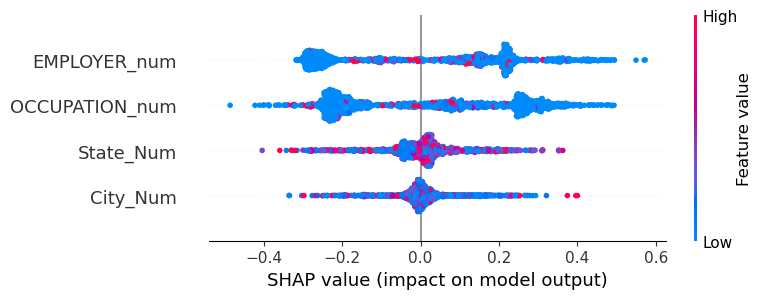

In [15]:
# Now you can use other SHAP plotting functions
# shap.summary_plot(shap_values, X_test_s1)

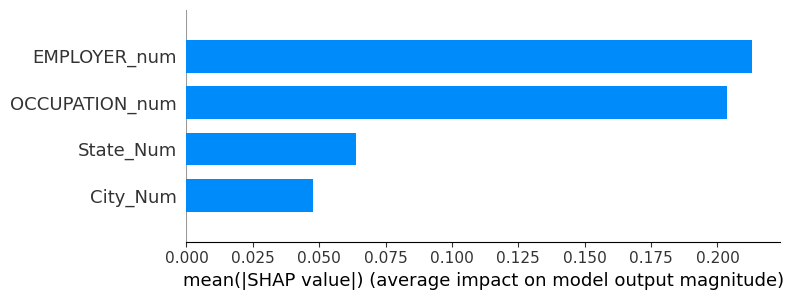

In [17]:
# shap.summary_plot(shap_values, X_test_s1, plot_type="bar")

Census income classification with XGBoost 
https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html 

In [9]:
# use partial data from X_test
X_test_s1 = X_test.sample(frac=0.001, random_state=42)

explainer = shap.TreeExplainer(best_model_xg)
shap_values = explainer.shap_values(X_test_s1)

[18:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [32]:
shap_values 

array([[-2.0713315 , -0.96439147, -5.3148026 ,  0.03537573],
       [ 1.0360377 ,  1.4677258 ,  3.0543094 ,  4.689856  ],
       [ 0.9269326 ,  1.0513622 ,  2.456953  ,  3.772605  ],
       ...,
       [-0.86984104, -2.382355  , -0.64625657, -3.9465182 ],
       [-1.2664317 , -1.0523255 , -4.4511366 , -0.14804742],
       [ 0.19639431, -0.5051777 , -4.2012362 ,  0.12140219]],
      dtype=float32)

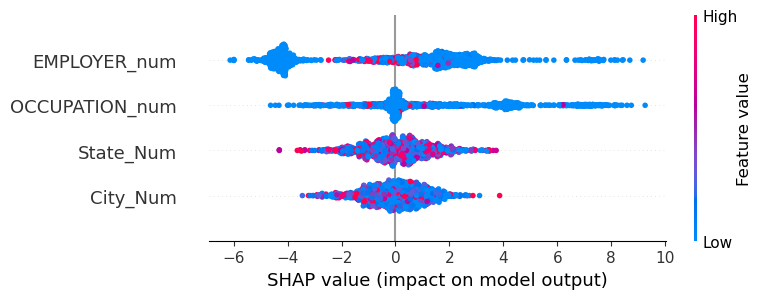

In [27]:
# Now you can use other SHAP plotting functions
shap.summary_plot(shap_values, X_test_s1)

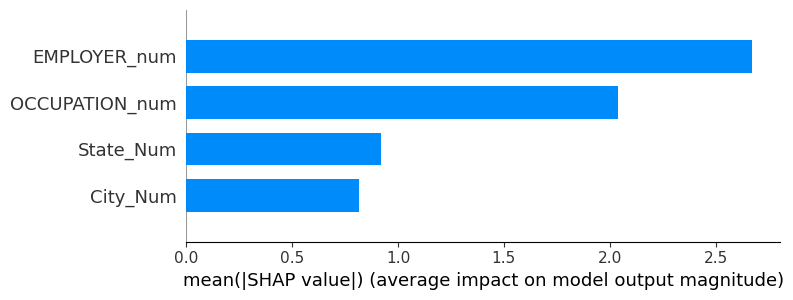

In [33]:
shap.summary_plot(shap_values, X_test_s1, plot_type="bar")

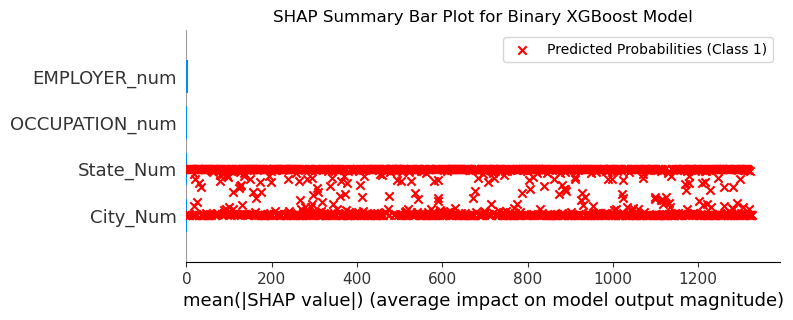

In [42]:
# Get predicted probabilities for class 1 (you may adjust this based on your model's output)
predicted_probabilities = best_model_xg.predict_proba(X_test_s1)[:, 1]

# Define class names
class_names = ['Class 0', 'Class 1']

# Create a SHAP summary bar plot with different colors for each class
shap.summary_plot(shap_values, X_test_s1, class_names=class_names, plot_type="bar", show=False)

# Customize the plot as needed
plt.title('SHAP Summary Bar Plot for Binary XGBoost Model')
plt.scatter(range(len(predicted_probabilities)), predicted_probabilities, c='red', marker='x', label='Predicted Probabilities (Class 1)')
plt.legend(loc='upper right')
plt.show()

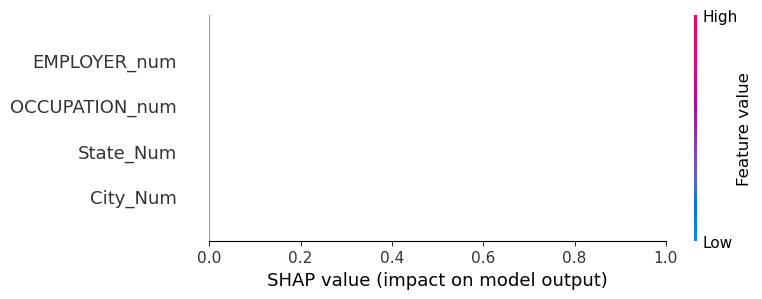

In [35]:
shap.summary_plot(shap_values,X_test_s1, plot_type="swarm")

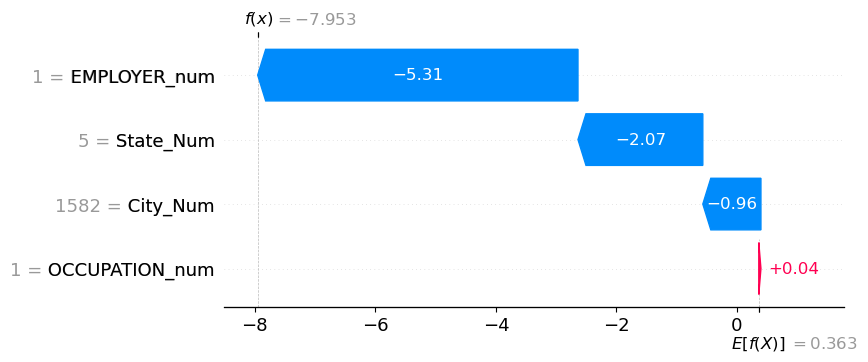

In [36]:
expected_value = explainer.expected_value
instance_index = 0
# Create an Explanation object
shap_values_instance = shap_values[instance_index, :]
shap_exp = shap.Explanation(values=shap_values_instance, base_values=expected_value, data=X_test_s1.iloc[instance_index, :], feature_names=X_test_s1.columns)

# Create a waterfall plot for a specific instance
shap.waterfall_plot(shap_exp, show=True)

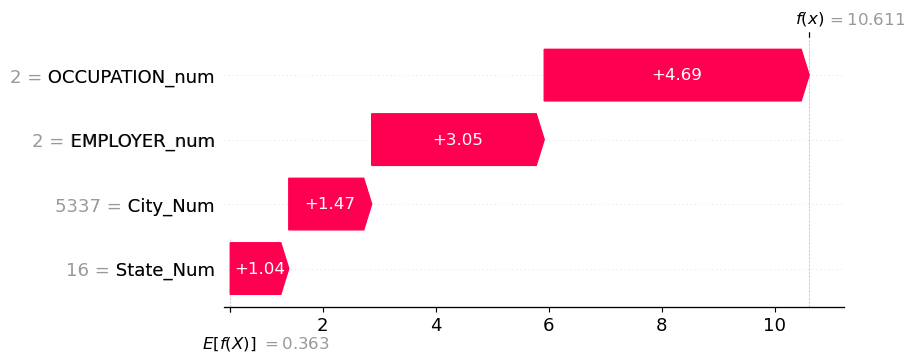

In [37]:
expected_value = explainer.expected_value
instance_index = 1
# Create an Explanation object
shap_values_instance = shap_values[instance_index, :]
shap_exp = shap.Explanation(values=shap_values_instance, base_values=expected_value, data=X_test_s1.iloc[instance_index, :], feature_names=X_test_s1.columns)

# Create a waterfall plot for a specific instance
shap.waterfall_plot(shap_exp, show=True)

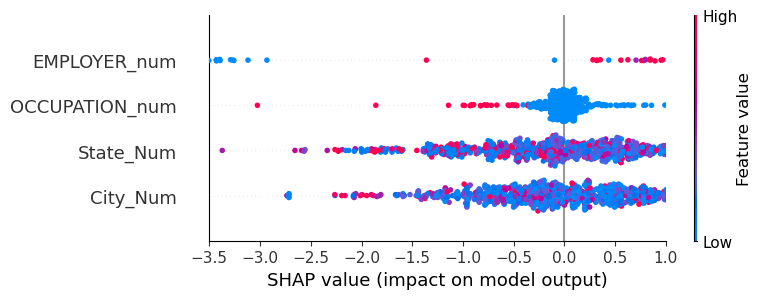

In [39]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Employer' is the feature you want to focus on
feature_to_show = 'EMPLOYER_num'

# Find the index of 'Employer' in the feature names
feature_index = X_test_s1.columns.get_loc(feature_to_show)

# Select only the 'Employer' column from the SHAP values
shap_values_employer = shap_values[:, feature_index]

# Get the corresponding 'Employer' values from the test set
employer_values = X_test_s1[feature_to_show].values

# Filter the data for values from 1 to 10
filter_values = (employer_values >= 1) & (employer_values <= 3)

# Plot the SHAP summary plot for the filtered values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[filter_values, :], X_test_s1.iloc[filter_values, :], feature_names=X_test_s1.columns, plot_type="dot", title=f'SHAP Summary Plot - {feature_to_show} values (1 to 10)', show=False)

# Adjust the x-axis range
plt.xlim(-3.5, 1)

# Show the plot using seaborn
sns.despine()
plt.show()

# Use more data from X_test to rerun above SHAP plots

In [12]:
# use partial data from X_test
X_test_s2 = X_test.sample(frac=0.01, random_state=42)

explainer = shap.TreeExplainer(best_model_xg)
shap_values_s2 = explainer.shap_values(X_test_s2)

[21:27:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [13]:
shap_values_s2 

array([[-2.0713315 , -0.96439147, -5.3148026 ,  0.03537573],
       [ 1.0360377 ,  1.4677258 ,  3.0543094 ,  4.689856  ],
       [ 0.9269326 ,  1.0513622 ,  2.456953  ,  3.772605  ],
       ...,
       [ 0.22959633, -0.37947738,  1.227974  , -2.0727434 ],
       [ 0.61940503,  0.76879674,  1.3856958 ,  1.8205147 ],
       [ 0.83391833, -0.2590626 ,  6.94564   ,  0.84394944]],
      dtype=float32)

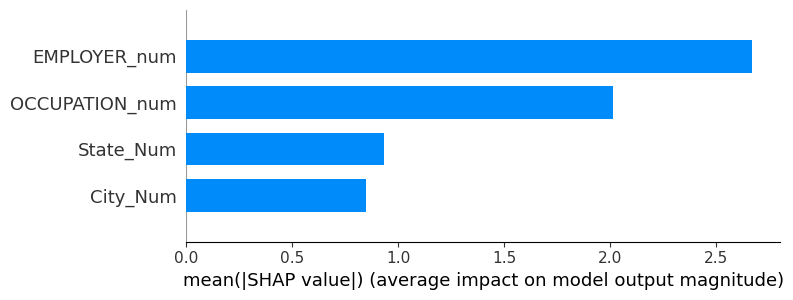

In [14]:
shap.summary_plot(shap_values_s2, X_test_s2, plot_type="bar")

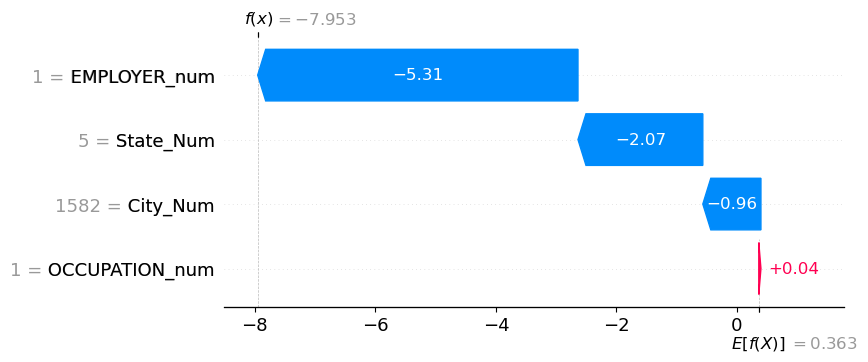

In [15]:
expected_value = explainer.expected_value
instance_index = 0
# Create an Explanation object
shap_values_instance = shap_values_s2[instance_index, :]
shap_exp = shap.Explanation(values=shap_values_instance, base_values=expected_value, data=X_test_s2.iloc[instance_index, :], feature_names=X_test_s2.columns)

# Create a waterfall plot for a specific instance
shap.waterfall_plot(shap_exp, show=True)

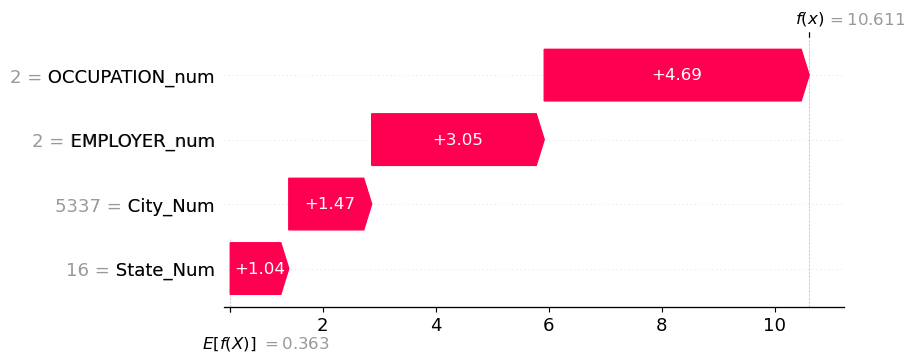

In [16]:
expected_value = explainer.expected_value
instance_index = 1
# Create an Explanation object
shap_values_instance = shap_values_s2[instance_index, :]
shap_exp = shap.Explanation(values=shap_values_instance, base_values=expected_value, data=X_test_s2.iloc[instance_index, :], feature_names=X_test_s2.columns)

# Create a waterfall plot for a specific instance
shap.waterfall_plot(shap_exp, show=True)

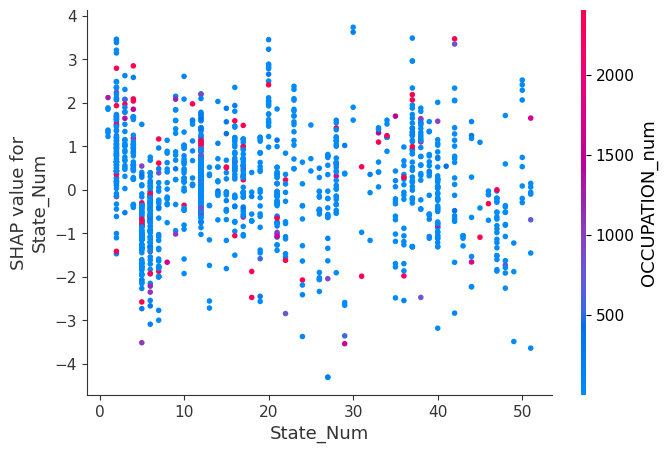

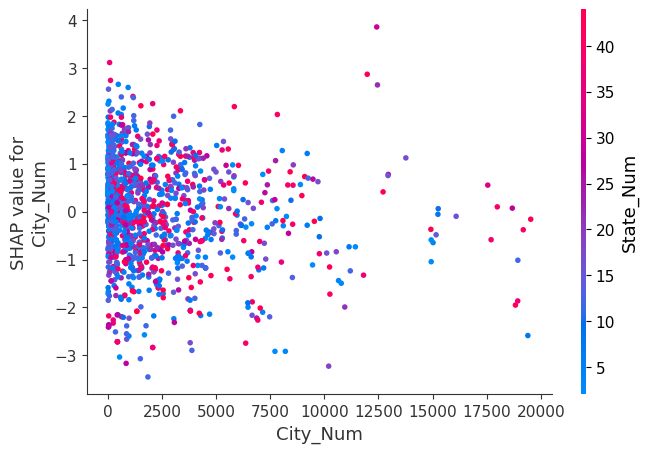

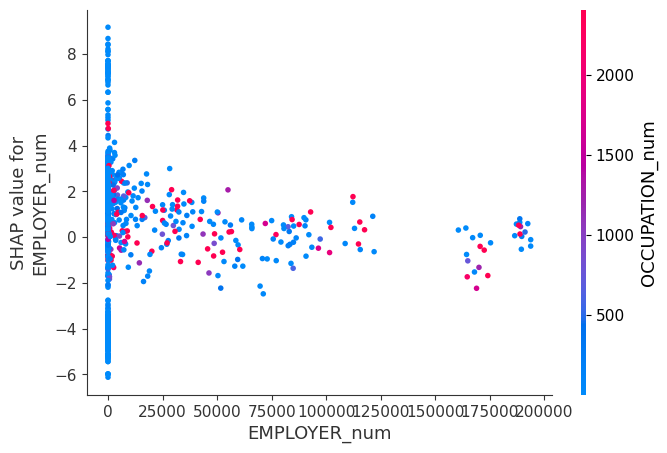

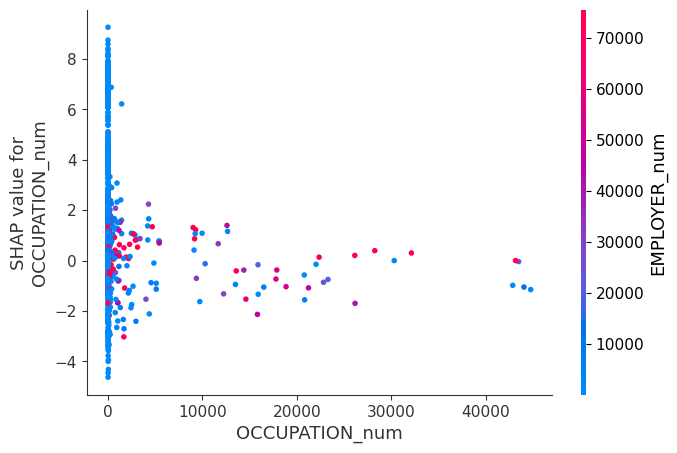

In [46]:
# SHAP Dependence Plots

for name in X_test_s1.columns:
    shap.dependence_plot(name, shap_values, X_test_s1, display_features=X_test_s1)

In [ ]:
explainer_1 = shap.TreeExplainer(best_model_xg)
shap_values_1 = explainer_1.shap_values(X_test)

[15:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
